# INTRODUCTION TO DATA SCIENCE MINI_PROJECT THREE

The project aims to predic the median price value of houses in a boston housing dataset.
The dataset used was collected by the U.S Census Service concerning housing in Boston area, and maintained at the Carnegie Mellon University. The dataset contains 506 observations and 14 attributes (though the 506th data point was used in checking the prediction. The attributes are enumerated below. 
    1. CRIM      per capita crime rate by town
    2. ZN        proportion of residential land zoned for lots over 25,000 sq.ft.
    3. INDUS     proportion of non-retail business acres per town
    4. CHAS      Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
    5. NOX       nitric oxides concentration (parts per 10 million)
    6. RM        average number of rooms per dwelling
    7. AGE       proportion of owner-occupied units built prior to 1940
    8. DIS       weighted distances to five Boston employment centres
    9. RAD       index of accessibility to radial highways
    10. TAX      full-value property-tax rate per $10,000
    11. PTRATIO  pupil-teacher ratio by town
    12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
    13. LSTAT    percentage lower status of the population
    14. MEDV     Median value of owner-occupied homes in $1000's

A predictive model is then built from the dataset  with the MEDV value as the output variable, using Keras neural network library and having Thensorflow library as backend to handle the low level operations.
For this project, the sequential model in keras was used as this is the simplest, and in my opinion consumes the least processing power. It uses the MLP (multi-layer perceptron architecture), and is essentially a stack of layers.

In carrying out this project, the data was downloaded and preprocessed, then seperated into two groups (a training and test group), then neural network model was built and the layers configured. Subsequently the model was compiled with training specifications and then trained using the numpy training data, and then used in predicting the test data.

### Importing the modules required

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

import seaborn

from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor

### Reading and Preprocessing the Dataset
The downloaded dataset is read and statistically analysed as a pandas dataframe. The basic descriptive statistical analysis for the dataset is displayed visually.
Then the dataset is then converted to a 2-dimensional numpy array using the list of attributes as columns. Afterwhich the variables are normalized in order for the neural network to interpret them properly, using the MaxMinScaler() function.

In [2]:
# a random seed is fixed for reproducibility
seed = 7
np.random.seed(seed)

# creating a list which contains the attributes needed
names = "CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV"
mynames = [x.strip() for x in names.split(',')]

print(mynames)

#downloading dataset and converting to a 2-dimensional numpy array
newdata = np.genfromtxt('housing.data',dtype=None, names=names)
mydata = np.column_stack(newdata[i] for i in mynames)
print(mydata.shape)

['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
(506, 14)


### Descriptive Statistical Analysis of Dataset

In [3]:
dataFordescribe = pd.DataFrame(mydata, columns=mynames) #creating a pandas dataframe for statistical analysis

In [4]:
dataFordescribe

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


### Visual Descriptions

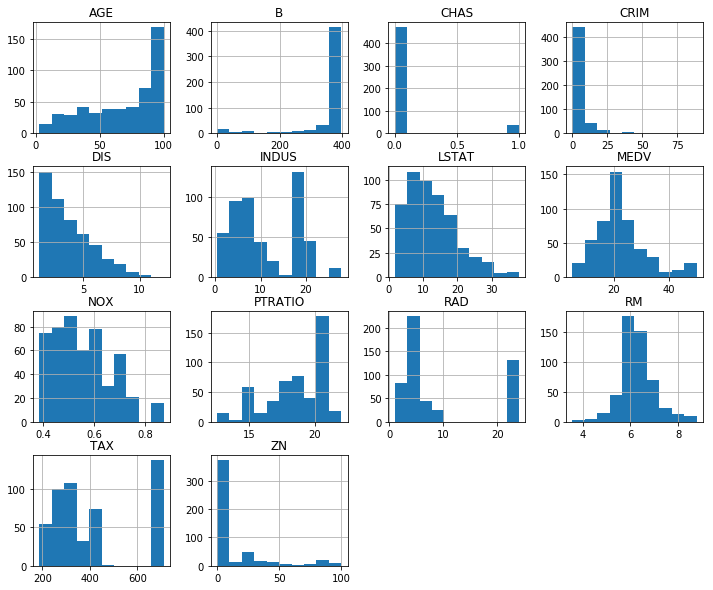

In [5]:
#displaying a histogram of the 14 variables
dataFordescribe.hist(figsize = (12,10))
plt.show()

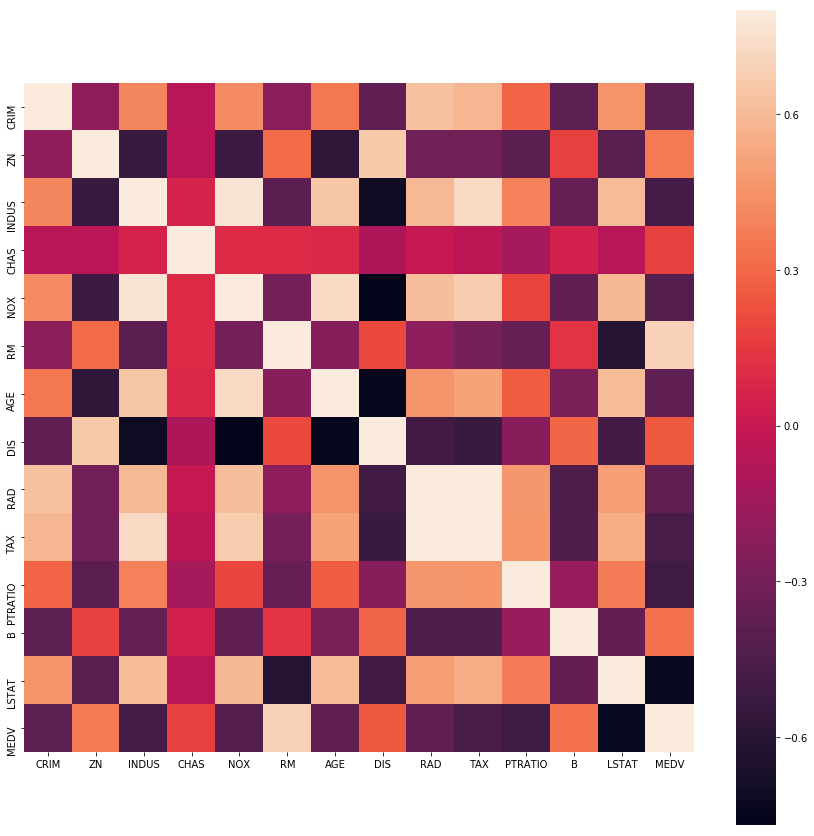

In [6]:
#creating a heatmap to show the correlations between the variables
var_heatmap = dataFordescribe.corr()
fig = plt.figure(figsize = (15,15))

seaborn.heatmap(var_heatmap, vmax = .8, square = True)
plt.show()

In [7]:
#providing overall statistics of the dataframe
dataFordescribe.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [8]:
np.unique(mydata[:,13])

array([ 5. ,  5.6,  6.3,  7. ,  7.2,  7.4,  7.5,  8.1,  8.3,  8.4,  8.5,
        8.7,  8.8,  9.5,  9.6,  9.7, 10.2, 10.4, 10.5, 10.8, 10.9, 11. ,
       11.3, 11.5, 11.7, 11.8, 11.9, 12. , 12.1, 12.3, 12.5, 12.6, 12.7,
       12.8, 13. , 13.1, 13.2, 13.3, 13.4, 13.5, 13.6, 13.8, 13.9, 14. ,
       14.1, 14.2, 14.3, 14.4, 14.5, 14.6, 14.8, 14.9, 15. , 15.1, 15.2,
       15.3, 15.4, 15.6, 15.7, 16. , 16.1, 16.2, 16.3, 16.4, 16.5, 16.6,
       16.7, 16.8, 17. , 17.1, 17.2, 17.3, 17.4, 17.5, 17.6, 17.7, 17.8,
       17.9, 18. , 18.1, 18.2, 18.3, 18.4, 18.5, 18.6, 18.7, 18.8, 18.9,
       19. , 19.1, 19.2, 19.3, 19.4, 19.5, 19.6, 19.7, 19.8, 19.9, 20. ,
       20.1, 20.2, 20.3, 20.4, 20.5, 20.6, 20.7, 20.8, 20.9, 21. , 21.1,
       21.2, 21.4, 21.5, 21.6, 21.7, 21.8, 21.9, 22. , 22.1, 22.2, 22.3,
       22.4, 22.5, 22.6, 22.7, 22.8, 22.9, 23. , 23.1, 23.2, 23.3, 23.4,
       23.5, 23.6, 23.7, 23.8, 23.9, 24. , 24.1, 24.2, 24.3, 24.4, 24.5,
       24.6, 24.7, 24.8, 25. , 25.1, 25.2, 25.3, 26

Beacause there are 50 unique output variables, there is a need to use a regression method, as this is not a classification problem

### Normalizing the dataset

In [5]:
x = mydata[:,0:13]
y = mydata[:,13]
print(y)
y=np.reshape(y, (-1,1)) #making numpy figure out the appropriate dimension of data

#Normalizing the data using the MaxMinScaler() function
scaler = MinMaxScaler()
print(scaler.fit(x))
print(scaler.fit(y))
xscale=scaler.transform(x)
yscale=scaler.transform(y)

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

In [6]:
print (y)

[[24. ]
 [21.6]
 [34.7]
 [33.4]
 [36.2]
 [28.7]
 [22.9]
 [27.1]
 [16.5]
 [18.9]
 [15. ]
 [18.9]
 [21.7]
 [20.4]
 [18.2]
 [19.9]
 [23.1]
 [17.5]
 [20.2]
 [18.2]
 [13.6]
 [19.6]
 [15.2]
 [14.5]
 [15.6]
 [13.9]
 [16.6]
 [14.8]
 [18.4]
 [21. ]
 [12.7]
 [14.5]
 [13.2]
 [13.1]
 [13.5]
 [18.9]
 [20. ]
 [21. ]
 [24.7]
 [30.8]
 [34.9]
 [26.6]
 [25.3]
 [24.7]
 [21.2]
 [19.3]
 [20. ]
 [16.6]
 [14.4]
 [19.4]
 [19.7]
 [20.5]
 [25. ]
 [23.4]
 [18.9]
 [35.4]
 [24.7]
 [31.6]
 [23.3]
 [19.6]
 [18.7]
 [16. ]
 [22.2]
 [25. ]
 [33. ]
 [23.5]
 [19.4]
 [22. ]
 [17.4]
 [20.9]
 [24.2]
 [21.7]
 [22.8]
 [23.4]
 [24.1]
 [21.4]
 [20. ]
 [20.8]
 [21.2]
 [20.3]
 [28. ]
 [23.9]
 [24.8]
 [22.9]
 [23.9]
 [26.6]
 [22.5]
 [22.2]
 [23.6]
 [28.7]
 [22.6]
 [22. ]
 [22.9]
 [25. ]
 [20.6]
 [28.4]
 [21.4]
 [38.7]
 [43.8]
 [33.2]
 [27.5]
 [26.5]
 [18.6]
 [19.3]
 [20.1]
 [19.5]
 [19.5]
 [20.4]
 [19.8]
 [19.4]
 [21.7]
 [22.8]
 [18.8]
 [18.7]
 [18.5]
 [18.3]
 [21.2]
 [19.2]
 [20.4]
 [19.3]
 [22. ]
 [20.3]
 [20.5]
 [17.3]
 [18.8]


### Spliting the dataset into training and test data

In [10]:
X_train, X_test, y_train, y_test = train_test_split(xscale, yscale)

### Creating the model
The neural network model is created using the 13 input variables (CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV), and two hidden layers of 24 and 16 neurons respectively, and finally using the linear activation function to process the output.

In [11]:
model = Sequential() #the sequential model is specified
#then the method of activation for the layers are specified
model.add(Dense(24, input_dim=13, kernel_initializer='normal', activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 24)                336       
_________________________________________________________________
dense_1 (Dense)              (None, 16)                400       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 753
Trainable params: 753
Non-trainable params: 0
_________________________________________________________________


In [12]:
#indicating the training specifications
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae', 'accuracy'])

Instructions for updating:
Use tf.cast instead.


The model is then trained with the training data using the fit method

In [13]:
#fiting the model
history = model.fit(X_train, y_train, epochs=150, batch_size=50,  verbose=1, validation_split=0.2)

Train on 303 samples, validate on 76 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/150
303/303 [==============================] - 0s 675us/sample - loss: 0.1184 - mean_squared_error: 0.1184 - mean_absolute_error: 0.2698 - acc: 0.0033 - val_loss: 0.0622 - val_mean_squared_error: 0.0622 - val_mean_absolute_error: 0.1928 - val_acc: 0.0000e+00
Epoch 2/150
303/303 [==============================] - 0s 39us/sample - loss: 0.0584 - mean_squared_error: 0.0584 - mean_absolute_error: 0.1887 - acc: 0.0099 - val_loss: 0.0482 - val_mean_squared_error: 0.0482 - val_mean_absolute_error: 0.1732 - val_acc: 0.0000e+00
Epoch 3/150
303/303 [==============================] - 0s 56us/sample - loss: 0.0448 - mean_squared_error: 0.0448 - mean_absolute_error: 0.1582 - acc: 0.0033 - val_loss: 0.0370 - val_mean_squared_error: 0.0370 - val_mean_absolute_error: 0.1395 - val_acc: 0.0132
Epoch 4/150
303/303 [==============================] - 0s 49us/sample - loss: 0.0372 - mean_squared_error: 0.037

303/303 [==============================] - 0s 46us/sample - loss: 0.0228 - mean_squared_error: 0.0228 - mean_absolute_error: 0.0990 - acc: 0.0132 - val_loss: 0.0175 - val_mean_squared_error: 0.0175 - val_mean_absolute_error: 0.0973 - val_acc: 0.0395
Epoch 32/150
303/303 [==============================] - 0s 63us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.1044 - acc: 0.0165 - val_loss: 0.0173 - val_mean_squared_error: 0.0173 - val_mean_absolute_error: 0.0961 - val_acc: 0.0395
Epoch 33/150
303/303 [==============================] - 0s 43us/sample - loss: 0.0220 - mean_squared_error: 0.0220 - mean_absolute_error: 0.1023 - acc: 0.0165 - val_loss: 0.0171 - val_mean_squared_error: 0.0171 - val_mean_absolute_error: 0.0908 - val_acc: 0.0395
Epoch 34/150
303/303 [==============================] - 0s 43us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0971 - acc: 0.0132 - val_loss: 0.0167 - val_mean_squared_error: 0.0167 - val_mean_ab

303/303 [==============================] - 0s 39us/sample - loss: 0.0140 - mean_squared_error: 0.0140 - mean_absolute_error: 0.0818 - acc: 0.0363 - val_loss: 0.0102 - val_mean_squared_error: 0.0102 - val_mean_absolute_error: 0.0737 - val_acc: 0.0395
Epoch 94/150
303/303 [==============================] - 0s 53us/sample - loss: 0.0137 - mean_squared_error: 0.0137 - mean_absolute_error: 0.0805 - acc: 0.0363 - val_loss: 0.0112 - val_mean_squared_error: 0.0112 - val_mean_absolute_error: 0.0852 - val_acc: 0.0395
Epoch 95/150
303/303 [==============================] - 0s 39us/sample - loss: 0.0155 - mean_squared_error: 0.0155 - mean_absolute_error: 0.0988 - acc: 0.0396 - val_loss: 0.0102 - val_mean_squared_error: 0.0102 - val_mean_absolute_error: 0.0725 - val_acc: 0.0395
Epoch 96/150
303/303 [==============================] - 0s 36us/sample - loss: 0.0138 - mean_squared_error: 0.0138 - mean_absolute_error: 0.0806 - acc: 0.0363 - val_loss: 0.0104 - val_mean_squared_error: 0.0104 - val_mean_ab

Then the model loss is displayed in a chart

dict_keys(['loss', 'mean_squared_error', 'mean_absolute_error', 'acc', 'val_loss', 'val_mean_squared_error', 'val_mean_absolute_error', 'val_acc'])


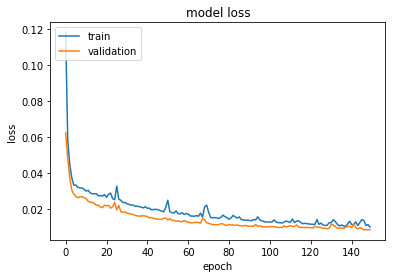

In [14]:
print(history.history.keys())
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [15]:
list(history.history)

['loss',
 'mean_squared_error',
 'mean_absolute_error',
 'acc',
 'val_loss',
 'val_mean_squared_error',
 'val_mean_absolute_error',
 'val_acc']

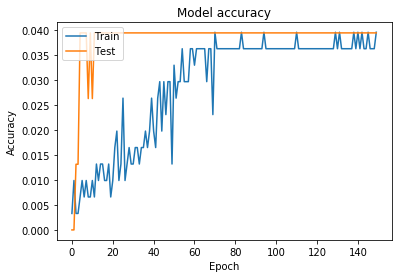

In [19]:
# Ploting the model accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()



The following 506th data point in the original dataset is used as an example in the prediction:


In [18]:
#0.04741   0.00  11.930  0  0.5730  6.0300  80.80  2.5050   1  273.0  21.00 396.90   7.88  11.90

In [20]:
#predicting a value of a datapoint in original dataset
Xnew = np.array([[0.04741,   0.00,  11.930,  0,  0.5730,  6.0300,  80.80,  2.5050,   1,  273.0,  21.00, 396.90,   7.88]])
ynew=model.predict(Xnew)
print("X=%s, Predicted=%s" % (Xnew[0], ynew[0]))

X=[4.741e-02 0.000e+00 1.193e+01 0.000e+00 5.730e-01 6.030e+00 8.080e+01
 2.505e+00 1.000e+00 2.730e+02 2.100e+01 3.969e+02 7.880e+00], Predicted=[10.688363]


In [21]:
# evaluating the model using the test dataset
scores = model.evaluate(X_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

127/127 [==============================] - 0s 47us/sample - loss: 0.0105 - mean_squared_error: 0.0105 - mean_absolute_error: 0.0701 - acc: 0.0157

mean_squared_error: 1.05%
